 
# Project: Regional trend of Bank Branch Closure, ATMs & Internet Usage.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Info**: On 13th of Jan 2022, I received an SMS from my bank informing me that effective 24th of Jan, the operations of closest branch serving a community of over 200,000 people will be relocated. It will be moved to join and operate from a different branch which is about 4km away. I tend to believe that my bank is among other banks across the world closing thier branches. Unfornately, these closures makes it difficult for local communities to access to banking opportunities. Fortunately, my bank left us with an ATM!
>
>This project investigates finance sector datasets from Gapminder World and it aims to gain insights into the access to commercial banks and ATMs by depositors across various regions in the world. The analysis covers steps ranging from wrangling data to exploratory data analysis before drawing conclusions.
>
>This investigation will answer the following questions:
> 1. How have the number of commercial bank branches, ATMs, commercial bank depositors and internet users changed over time across various the regions?
> 2. a : What is the shape of the distribution for the latest year 2019? 2. b : How does the shape of the distribution differ across geographical regions for 2019?
> 3. Is there relationship between commercial bank branches, ATMs, commercial bank depositors and internet users?

In [84]:
# Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import configparser
import datetime
%matplotlib inline
 
import statsmodels.api as sms # linear fit
from sklearn.metrics import r2_score
from functools import reduce # combining pandas dataframes 
from datetime import datetime, timedelta # converting strings to datetime format


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, and will utilize the shape, head, info, dtypes and histograms to get a good idea of dataset and plan accordingly for trimming and cleaning the dataset for analysis. After opening files in excel, I noticed that the datasets have the same country columns so I decided to load into Pandas DataFrames with index column as country 

### General Properties

In [85]:
# load the data
atm_total = pd.read_csv('fb_atm_totl_p5.csv') # Automated teller machines (ATMs) (per 100,000 adults)
cbk_branch = pd.read_csv('fb_cbk_brch_p5.csv') # Commercial bank branches(per 100,000 adults)
cbk_dptr = pd.read_csv('fb_cbk_dptr_p3.csv') # Depositors with commercial banks (per 100,000 adults)
net_users = pd.read_csv('net_users_num.csv') # Number of people using internet
geo_country = pd.read_excel('data_geographies _v2_ by_gapminder.xlsx', 
                            sheet_name = 'list-of-countries-etc') # Countries and region

#### Checking the first 5 rows for each dataset

In [86]:
atm_total.head()

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.00,120.00,124.00,118.00,119.00,126.00,125.00,126.00,127.00,126.0
1,Afghanistan,0.02,0.06,0.12,0.21,0.30,0.45,0.53,0.62,0.64,0.71,0.75,0.92,1.06,1.21,1.61,1.64,NaN
2,Angola,0.85,1.45,3.04,4.40,6.24,8.34,10.40,12.70,15.20,17.00,18.20,18.80,19.10,19.10,18.90,18.40,NaN
3,Albania,4.23,9.26,13.90,19.40,28.60,32.90,34.10,35.30,35.70,35.40,34.80,35.30,34.10,31.70,30.60,30.00,31.4
4,United Arab Emirates,18.30,42.10,38.20,39.30,40.40,52.60,50.60,53.90,56.90,58.80,61.10,64.40,65.40,65.40,64.50,60.90,52.5


In [87]:
cbk_branch.head()

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.00,22.00,19.30,19.1,18.90,19.80,18.50,17.20,14.80,11.30
1,Afghanistan,0.37,0.58,0.92,1.24,1.48,2.23,2.39,2.22,2.13,2.25,2.3,2.16,2.11,2.04,1.96,1.87,NaN
2,Angola,1.81,2.24,3.38,3.87,4.65,5.22,7.41,8.37,9.04,10.20,10.2,10.40,10.30,10.30,9.49,9.44,8.75
3,Albania,9.68,11.70,13.80,18.60,23.50,24.00,24.10,24.10,24.10,23.50,22.1,22.00,21.70,20.70,19.50,18.70,18.60
4,United Arab Emirates,15.10,13.30,12.60,12.20,12.30,11.80,11.70,11.70,12.00,12.40,12.8,12.80,12.40,11.30,10.70,9.53,7.98


In [88]:
cbk_dptr.head()

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,NaN,NaN,NaN,NaN,36.4,87.5,106.0,139.0,166.0,156.0,173.0,181.0,182.0,166.0,174.0,183.0,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110.0,1090.0,1050.0,1090.0,1130.0
2,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,886.0,885.0,1010.0,1060.0,1080.0,1080.0,1220.0
3,Argentina,477.0,508.0,550.0,605.0,616.0,641.0,675.0,727.0,807.0,863.0,908.0,955.0,1070.0,1150.0,1210.0,1180.0,1360.0
4,Azerbaijan,NaN,93.2,144.0,194.0,263.0,304.0,361.0,402.0,465.0,542.0,626.0,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
net_users.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0,0,0,0,0,0,NaN,NaN,NaN,...,1.17M,1.51M,1.7M,1.9M,2.34M,2.84M,3.96M,4.9M,5.02M,5.14M
1,Angola,0,0,0,0,0,0,112,844,2830,...,654k,751k,1.63M,2.32M,5.77M,3.46M,3.75M,4.28M,4.42M,4.56M
2,Albania,0,0,0,0,0,348,998,1510,2020,...,1.33M,1.44M,1.59M,1.66M,1.74M,1.83M,1.92M,2.07M,2.07M,2.01M
3,Andorra,0,0,0,0,0,0,983,1960,4420,...,68.4k,67.8k,71.2k,75.9k,76k,75.6k,75.7k,70.5k,70.5k,70.6k
4,United Arab Emirates,0,0,0,0,0,2490,9530,88k,194k,...,5.81M,6.98M,7.77M,8.09M,8.33M,8.38M,8.48M,9M,9.48M,9.69M


In [90]:
geo_country.head()

,country,World bank region,four_regions,eight_regions,six_regions,geo,members_oecd_g77,Latitude,Longitude,UN member since,"World bank, 4 income groups 2017","World bank, 3 income groups 2017",UNHCR
0,Australia,East Asia & Pacific,asia,east_asia_pacific,east_asia_pacific,aus,oecd,-25.0,135.00000,1945-11-01,High income,High income,Asia and the Pacific
1,Brunei,East Asia & Pacific,asia,east_asia_pacific,east_asia_pacific,brn,g77,4.5,114.66667,1984-09-21,High income,High income,Asia and the Pacific
2,Cambodia,East Asia & Pacific,asia,east_asia_pacific,east_asia_pacific,khm,g77,13.0,105.00000,1955-12-14,Lower middle income,Middle income,Asia and the Pacific
3,China,East Asia & Pacific,asia,east_asia_pacific,east_asia_pacific,chn,g77,35.0,105.00000,1945-10-24,Upper middle income,Middle income,Asia and the Pacific
4,Fiji,East Asia & Pacific,asia,east_asia_pacific,east_asia_pacific,fji,g77,-18.0,178.00000,1970-10-13,Upper middle income,Middle income,Asia and the Pacific


Observations:
> - Datasets are wide and need to be transposed in order to perform trend analysis
> - Dataset: geo_country needs to be trimmed to country and World bank region. Also columns names should be in small caps

In [91]:
#### Checking the missing data and dimensions for each dataset

In [92]:
atm_total.isna().sum()

country     0
2004       63
2005       46
2006       38
2007       30
2008       22
2009       19
2010       10
2011        4
2012        3
2013        6
2014        6
2015        7
2016       10
2017       11
2018       15
2019       20
2020       31
dtype: int64

In [93]:
cbk_branch.isna().sum()

country     0
2004       25
2005       19
2006       15
2007       12
2008        7
2009        3
2010        3
2011        1
2012        0
2013        2
2014        6
2015        7
2016       12
2017       12
2018       15
2019       20
2020       28
dtype: int64

In [94]:
cbk_dptr.isna().sum() 

country     0
2004       57
2005       47
2006       43
2007       39
2008       30
2009       24
2010       22
2011       17
2012       13
2013       12
2014       14
2015       11
2016       12
2017       12
2018       15
2019       18
2020       24
dtype: int64

In [95]:
net_users.isna().sum() 

country     0
1990        3
1991        3
1992        3
1993        3
1994        3
1995        3
1996       34
1997       21
1998       17
1999       12
2000        8
2001        5
2002        3
2003        3
2004        1
2005        1
2006        2
2007        2
2008        2
2009        2
2010        3
2011        2
2012        2
2013        1
2014        1
2015        1
2016        1
2017        1
2018        2
2019        1
dtype: int64

Printing the shapes of the dataframes to check if data is complete with the same number of countries and start at different years.

In [96]:
# view dimensions of dataset
print(
    " ATM total:", atm_total.shape,
    "\n Commercial bank branch:", cbk_branch.shape,
    "\n Commercial bank depositors:", cbk_dptr.shape,
    "\n Internet users:", net_users.shape,
    "\n Countries:", geo_country.shape
)

 ATM total: (188, 18) 
 Commercial bank branch: (186, 18) 
 Commercial bank depositors: (106, 18) 
 Internet users: (196, 31) 
 Countries: (197, 13)


Observations:
> - ATM total, Commercial bank branch and Commercial bank depositors datasets have the same time frame in years but differs in number of countries. However, there are more countries present in  internet users and countries dataframes.
> - In addition, to ensure a trend analysis is possible, the datasets ought to be cleaned and transposed by the country and year.That means each row becomes an observation and each column a variable.


> Based on the above checks for missing values, I have chosen to focus only on a period of 10 years from 2009 and 2019 as these years were present in all datasets with not so many missing value.

### Data Cleaning (Replace this with more specific notes!)

> I want to merge all tables to one table where column country would be merging anchor for all data.  I will keep only regions and countries columns in the geo_country dataset. Also, I select 2009 to 2019 years columns for the rest of the dataset. I will merge all the datasets after I reshape the datasets  by country and year so that each row becomes an observation and each column a variable.

In [97]:
# from Regions table all unnecessary columns were dropped and renamed World bank region to snake_case
geo_country_clean = geo_country.drop((geo_country.iloc[:, 2: geo_country.shape[1]]), axis=1)
geo_country_clean = geo_country_clean.rename(columns = {'World bank region':'world_bank_region'}) # columns name in small caps
geo_country_clean.head()


,country,world_bank_region
0,Australia,East Asia & Pacific
1,Brunei,East Asia & Pacific
2,Cambodia,East Asia & Pacific
3,China,East Asia & Pacific
4,Fiji,East Asia & Pacific


In [98]:
# drop other columns except country and years 2010 to 2019 columns for the rest of the dataset
atm_total_clean = atm_total.drop(columns=['2004','2005','2006','2007','2008','2020'])
cbk_branch_clean = cbk_branch.drop(columns=['2004','2005','2006','2007','2008','2020'])
cbk_dptr_clean = cbk_dptr.drop(columns=['2004','2005','2006','2007','2008','2020'])
net_users_clean = net_users.drop(net_users.iloc[:, 1:20], axis = 1)
net_users_clean.head()

,country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,1.01M,1.17M,1.51M,1.7M,1.9M,2.34M,2.84M,3.96M,4.9M,5.02M,5.14M
1,Angola,518k,654k,751k,1.63M,2.32M,5.77M,3.46M,3.75M,4.28M,4.42M,4.56M
2,Albania,1.22M,1.33M,1.44M,1.59M,1.66M,1.74M,1.83M,1.92M,2.07M,2.07M,2.01M
3,Andorra,66.3k,68.4k,67.8k,71.2k,75.9k,76k,75.6k,75.7k,70.5k,70.5k,70.6k
4,United Arab Emirates,5.07M,5.81M,6.98M,7.77M,8.09M,8.33M,8.38M,8.48M,9M,9.48M,9.69M


> From the above check, net_users_clean dataset has M and K sting objects that represent Million and Thousand respectively. I convert them to float by multiplying by a 1000 and 1000000 
> Using the melt function, I will reshape the datasets  by country and year so that each row becomes an observation and each column a variable.

In [99]:
# function to reshape the data using melt function
def df_reshape(df, value_name):
    df = pd.melt(df, id_vars = ["country"], var_name = "year", value_name = value_name) 
    df.sort_values(["country", "year"], inplace = True)
    return df

In [100]:
# df_reshape function is called for every dataframe
atm_total_transpose = df_reshape(atm_total_clean, "atm_total")
cbk_branch_transpose = df_reshape(cbk_branch_clean, "commercial_bank_branch")
cbk_dptr_transpose = df_reshape(cbk_dptr_clean, "commercial_bank_depositors")
net_users_transpose = df_reshape(net_users_clean, "internet_users")

In [101]:
# checking the first 5 rows for one of the transposed dataset
net_users_transpose.head()

,country,year,internet_users
0,Afghanistan,2009,1.01M
196,Afghanistan,2010,1.17M
392,Afghanistan,2011,1.51M
588,Afghanistan,2012,1.7M
784,Afghanistan,2013,1.9M


In [102]:
# bundling dataframes into one list
dataframe = [atm_total_transpose, cbk_branch_transpose, cbk_dptr_transpose, net_users_transpose]

# reduce() function accepts a function and a sequence and returns a single value calculated
df_main = reduce(lambda left,right: pd.merge(left,right, how='outer', on=['year', 'country']), dataframe) 

# merged all daframe table with regions table in one:
df_final = pd.merge(df_main, geo_country_clean, left_on='country', right_on='country', how='left')


> Now having consolidated the data in a suitable format in one dateframe, the next steps are to check the amout of missing values, the datatypes and for duplicates.


In [103]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     2200 non-null   object 
 1   year                        2200 non-null   object 
 2   atm_total                   1957 non-null   float64
 3   commercial_bank_branch      1965 non-null   float64
 4   commercial_bank_depositors  996 non-null    float64
 5   internet_users              2139 non-null   object 
 6   world_bank_region           2134 non-null   object 
dtypes: float64(3), object(4)
memory usage: 137.5+ KB


> All datatypes are suitable for analysis, exept 'internet users' & 'year' colums, which are string object. 'Year' has to be converted into a datetime object and 'internet users' to float.

In [104]:
# fix data type: year to datetime
df_final['year'] = df_final['year'].apply(lambda x: datetime.strptime(x, '%Y'))

In [105]:
df_final.info() 
# year to datetime data type fixed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   country                     2200 non-null   object        
 1   year                        2200 non-null   datetime64[ns]
 2   atm_total                   1957 non-null   float64       
 3   commercial_bank_branch      1965 non-null   float64       
 4   commercial_bank_depositors  996 non-null    float64       
 5   internet_users              2139 non-null   object        
 6   world_bank_region           2134 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 137.5+ KB


In [106]:
# converting a string object value with M and K to million and thousand
def value_to_float(x):
    '''
    The internet users(net_users_clean) dataset has M and K sting objects that represent Million and Thousand respectively.
    Using the function below, I convert them to float by multiplying by a 1000 and 1000000.
    '''
    if type(x) == float or type(x) == int:
        return x
    elif 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    elif 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    elif 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return np.nan

df_final['internet_users'] = df_final['internet_users'].apply(value_to_float)

In [107]:
df_final.head()

,country,year,atm_total,commercial_bank_branch,commercial_bank_depositors,internet_users,world_bank_region
0,Afghanistan,2009-01-01,0.45,2.23,87.5,1010000.0,South Asia
1,Afghanistan,2010-01-01,0.53,2.39,106.0,1170000.0,South Asia
2,Afghanistan,2011-01-01,0.62,2.22,139.0,1510000.0,South Asia
3,Afghanistan,2012-01-01,0.64,2.13,166.0,1700000.0,South Asia
4,Afghanistan,2013-01-01,0.71,2.25,156.0,1900000.0,South Asia


In [108]:
df_final.info()
# internet_users data type fixed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   country                     2200 non-null   object        
 1   year                        2200 non-null   datetime64[ns]
 2   atm_total                   1957 non-null   float64       
 3   commercial_bank_branch      1965 non-null   float64       
 4   commercial_bank_depositors  996 non-null    float64       
 5   internet_users              1344 non-null   float64       
 6   world_bank_region           2134 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 137.5+ KB


In [109]:
# check for duplicates
df_final.duplicated().sum()

#Luckily there are no duplicates

0

In [110]:
# check for missing values
df_final.isna().sum() 

country                          0
year                             0
atm_total                      243
commercial_bank_branch         235
commercial_bank_depositors    1204
internet_users                 856
world_bank_region               66
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: How have the number of commercial bank branches, ATMs, commercial bank depositors and internet users changed over time across various the regions?

In [111]:
# I begin with how the merged data looks in terms of commercial bank branches. 
#I try to answer how have Commercial bank branches(per 100,000 adults) changed over time across various the regions?

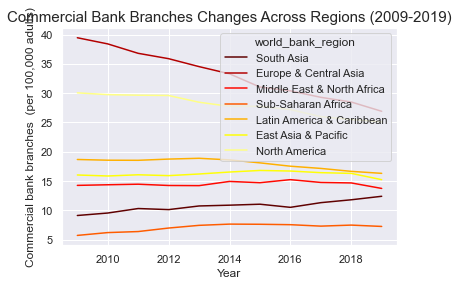

In [112]:
#line plot of the varibale commercial branches by region
sns.lineplot(x ='year', y = 'commercial_bank_branch', data=df_final,palette = 'hot', hue='world_bank_region', dashes = False ,ci=None)
plt.xlabel("Year", fontsize= 12)
plt.ylabel("Commercial bank branches  (per 100,000 adults)", fontsize= 12)
plt.title("Commercial Bank Branches Changes Across Regions (2009-2019)", fontsize= 15)
sns.set(rc={'figure.figsize':(20,10)});

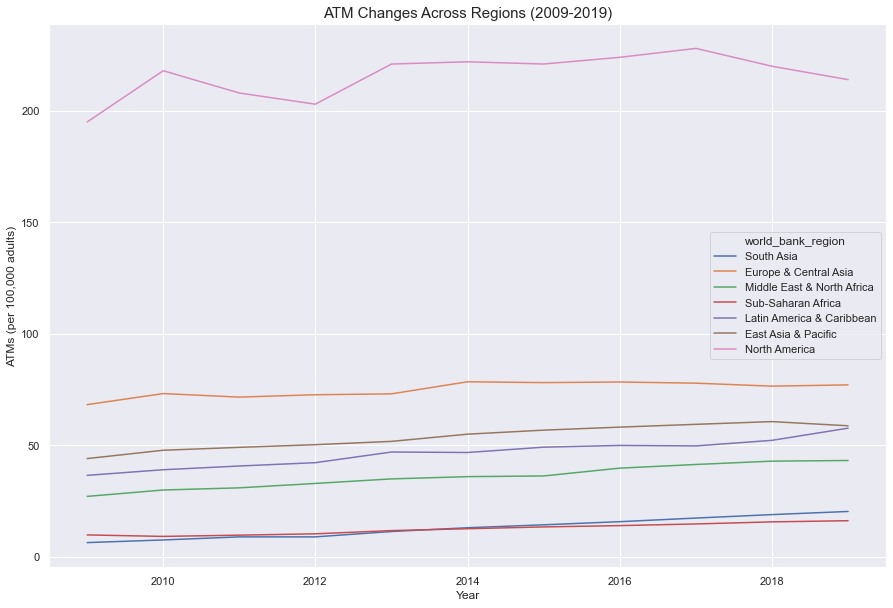

In [136]:
#line plot of the varibale Automated teller machines (ATMs)  by region
sns.lineplot(x ='year', y = 'atm_total', data=df_final,palette = 'deep', hue='world_bank_region', dashes = False ,ci=None)
plt.xlabel("Year", fontsize= 12)
plt.ylabel("ATMs (per 100,000 adults)", fontsize= 12)
plt.title("ATM Changes Across Regions (2009-2019)", fontsize= 15)
sns.set(rc={'figure.figsize':(20,10)});

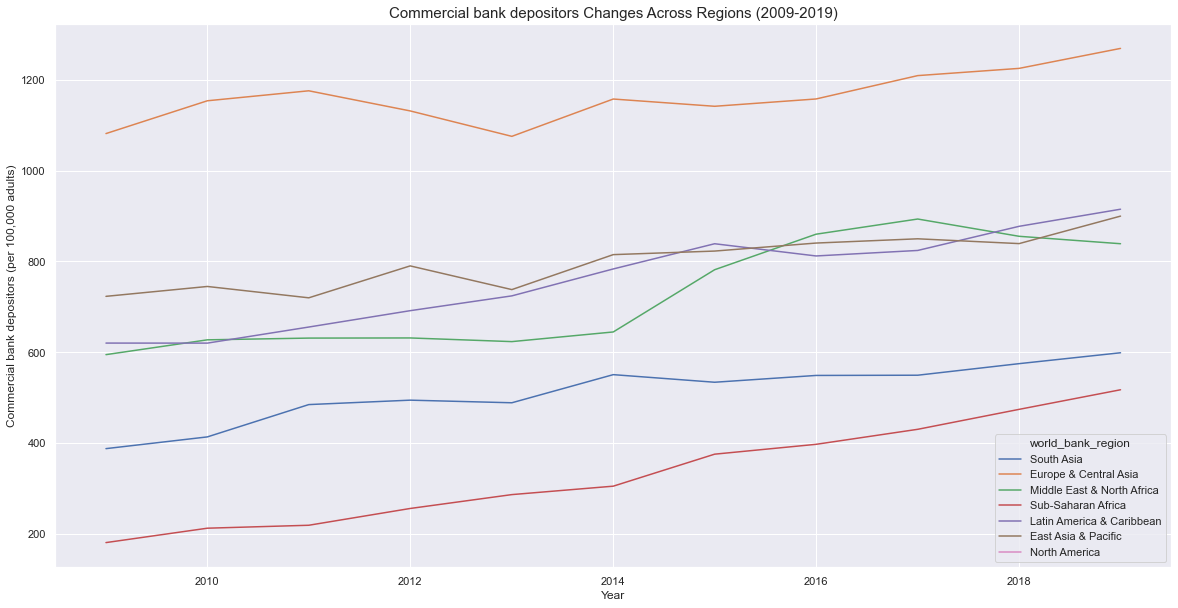

In [114]:
#line plot of the varibale commercial bank depositors  by region
sns.lineplot(x ='year', y = 'commercial_bank_depositors', data=df_final,palette = 'deep', hue='world_bank_region', dashes = False ,ci=None)
plt.xlabel("Year", fontsize= 12)
plt.ylabel("Commercial bank depositors (per 100,000 adults)", fontsize= 12)
plt.title("Commercial bank depositors Changes Across Regions (2009-2019)", fontsize= 15)
sns.set(rc={'figure.figsize':(20,10)});

In [115]:
# Investigate if indeed there are missing values in North America
df_namerica = df_final.loc[df_final.world_bank_region == 'North America', :]
df_namerica.describe()

,atm_total,commercial_bank_branch,commercial_bank_depositors,internet_users
count,12.000000,22.000000,0.0,2.200000e+01
mean,214.083333,27.890909,NaN,1.391500e+08
std,14.368263,5.673658,NaN,1.125914e+08
min,174.000000,19.700000,NaN,2.710000e+07
25%,212.500000,23.150000,NaN,3.142500e+07
50%,219.000000,27.400000,NaN,1.255000e+08
75%,221.250000,32.625000,NaN,2.345000e+08
max,228.000000,35.900000,NaN,2.870000e+08


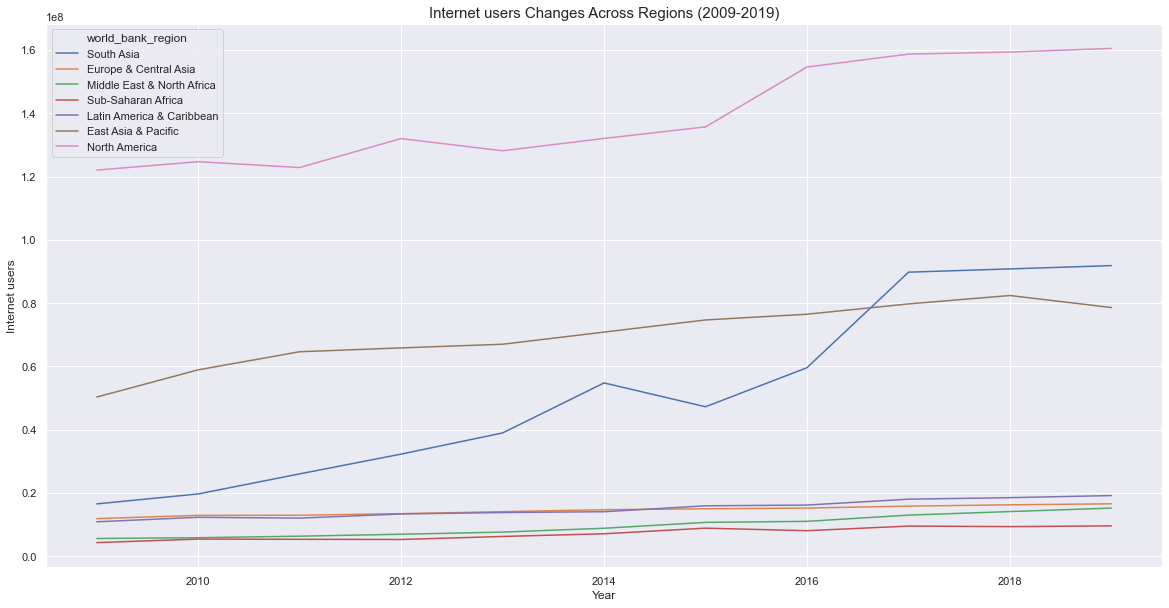

In [116]:
#line plot of the varibale internet_users  by region
sns.lineplot(x ='year', y = 'internet_users', data=df_final,palette = 'deep', hue='world_bank_region', dashes = False ,ci=None)
plt.xlabel("Year", fontsize= 12)
plt.ylabel("Internet users", fontsize= 12)
plt.title("Internet users Changes Across Regions (2009-2019)", fontsize= 15)
sns.set(rc={'figure.figsize':(15,10)});

In [117]:
### ratio of commercial banks to atms over time would 
### help answer the question of whether the atm is replacing traditional banking

In [118]:
# ratio of atm to commmercial banks
df_final['atm_comm_bank_ratio'] = df_final['atm_total'].div(df_final['commercial_bank_branch'])

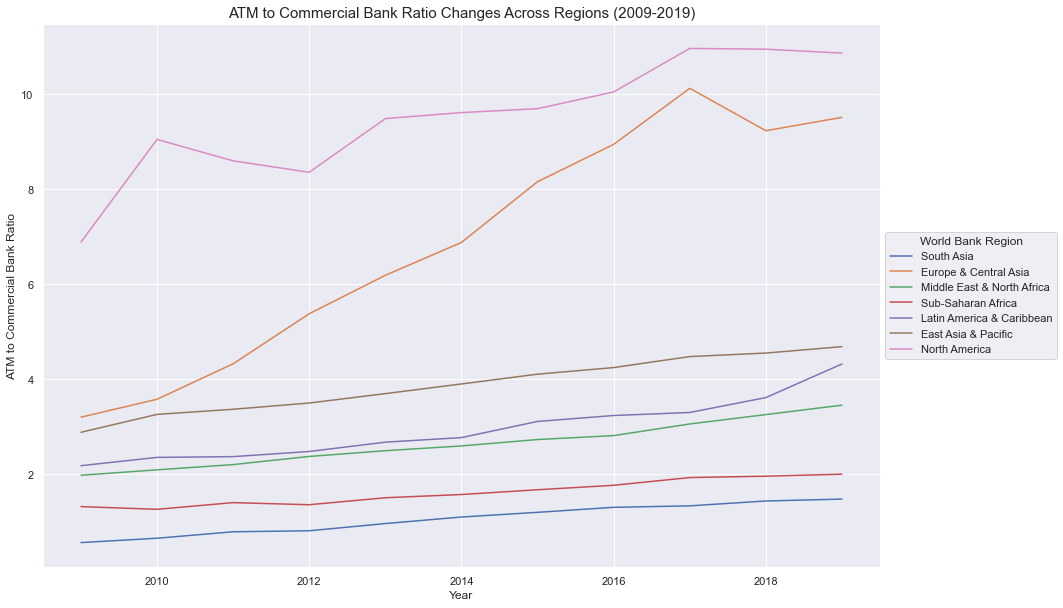

In [119]:
# line plot of the variable atm to commmercial banks by region
sns.lineplot(x = 'year', y = 'atm_comm_bank_ratio', data = df_final, palette = 'deep',
             hue = 'world_bank_region', dashes = False, ci = None )
plt.xlabel("Year", fontsize = 12)
plt.ylabel("ATM to Commercial Bank Ratio", fontsize = 12)
plt.title("ATM to Commercial Bank Ratio Changes Across Regions (2009-2019)", fontsize = 15)
# format legend
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), title =  "World Bank Region", title_fontsize = 12);


Observations:
> - Commercial bank branches have either remained steady or declined in number for the period. I see that Europe and South Asia tend to have the steapest decline while the rest of the regions remained steady. South Asia
> - ATMs saw a slow growth in all regions for the time period observed. However, the number of ATMs in North America is signifcantly higher than the other regions.
> - Commercial bank depositors connections saw a steady increase over the time period across all regions. Sub-Saharan Africa is even close to catching up with South Asia at the end of the period. However, there were missing values in North America from the data
> - Internet usage have remained the same for all regions except for North America, South Asia and East Asia & Pacific. While the number of internet users in South Asia surpased East Asia & Pacific at the beginning of 2015, North America, is at the forefront and is increasing siginficantly over the time period.
> - The unward trend of ratio of atm to commmercial banks, shows that more atms are avaible compared to commercial banks

### Research Question 2 a : What is the shape of the distribution for the latest year 2019?

In [120]:
#subset dataframe for year of interest (2019)
df_2019 = df_final.loc[df_final.year == '2019', :]
df_2019.head()

,country,year,atm_total,commercial_bank_branch,commercial_bank_depositors,internet_users,world_bank_region,atm_comm_bank_ratio
10,Afghanistan,2019-01-01,1.64,1.87,183.0,5140000.0,South Asia,0.877005
21,Albania,2019-01-01,30.00,18.70,1090.0,2010000.0,Europe & Central Asia,1.604278
32,Algeria,2019-01-01,9.64,5.24,NaN,25700000.0,Middle East & North Africa,1.839695
43,Angola,2019-01-01,18.40,9.44,NaN,4560000.0,Sub-Saharan Africa,1.949153
54,Antigua and Barbuda,2019-01-01,66.00,23.80,NaN,NaN,Latin America & Caribbean,2.773109


In [121]:
#summary stats on numerical columns for 2019
df_2019.describe()

,atm_total,commercial_bank_branch,commercial_bank_depositors,internet_users,atm_comm_bank_ratio
count,168.000000,166.000000,88.000000,1.390000e+02,164.000000
mean,54.407262,16.810602,820.200000,2.820468e+07,5.140061
std,51.508488,15.895448,579.311651,8.229762e+07,18.104234
min,0.670000,0.420000,33.200000,1.030000e+06,0.428358
25%,17.025000,6.565000,283.500000,2.785000e+06,1.595184
50%,42.600000,13.250000,764.500000,7.480000e+06,2.534959
75%,70.975000,23.400000,1165.000000,2.095000e+07,4.501117
max,323.000000,140.000000,2420.000000,7.790000e+08,229.285714


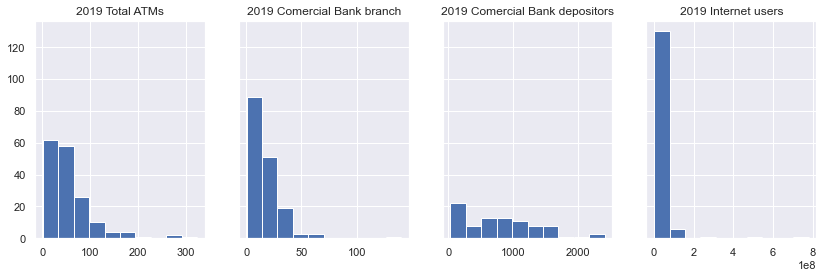

In [122]:
# create array of values and assign to variable
atm = df_2019.atm_total.values
cbb = df_2019.commercial_bank_branch.values
cbd = df_2019.commercial_bank_depositors.values
intuser = df_2019.internet_users.values

#create space for figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize= (14,4), sharey= True)

# draw histogram for each of the variables
axs[0].hist(atm);
axs[1].hist(cbb);
axs[2].hist(cbd);
axs[3].hist(intuser);

#label title for each plot
axs[0].set_title('2019 Total ATMs') 
axs[1].set_title('2019 Comercial Bank branch') 
axs[2].set_title('2019 Comercial Bank depositors') 
axs[3].set_title('2019 Internet users');

Observations:
> - The variables Total ATMs,  Comercial Bank branch, and Internet users are skewed to the right, whereas the variable Comercial Bank depositors comes closest to resembling a uniform distrubtion. Since it is skewed to the right, the median may be a more accurate measure of central tendency than the mean

### Research Question 2 b: How does the shape of the distribution differ across geographical regions for 2019?

Text(5.960000000000001, 0.5, 'Y_Label')

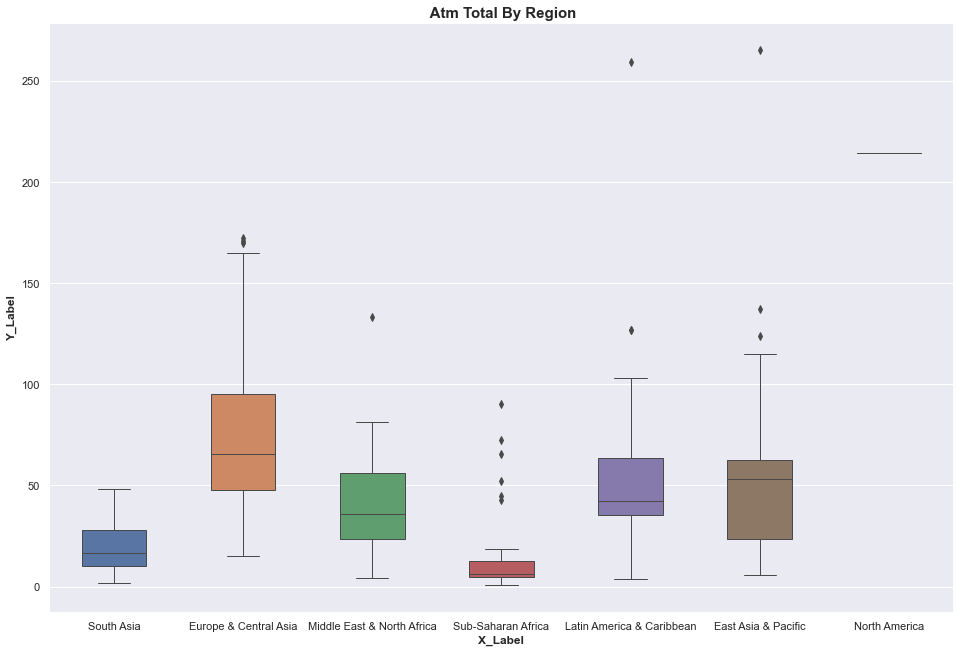

In [123]:
#box plot of the variable ATM total by region
sns.catplot(x="world_bank_region", y="atm_total", kind="box", 
            data=df_2019 ,width=0.5,  height=9 ,linewidth = 1, aspect=1.5);
plt.title(' ATM total by Region'.title(),
               fontsize = 15, weight = "bold")
plt.xlabel('Region'.title(),
               fontsize = 12, weight = "bold")
plt.ylabel('ATM'.title(),
               fontsize = 12, weight = "bold")

Text(5.960000000000001, 0.5, 'Y_Label')

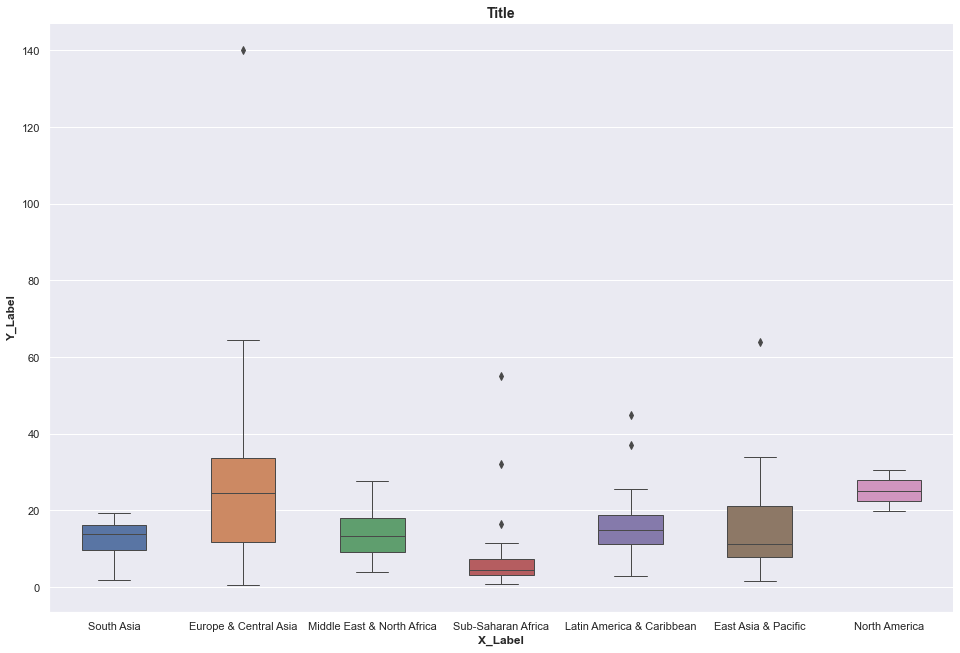

In [124]:
#box plot of the variable Comercial Bank branch by region
sns.catplot(x="world_bank_region", y="commercial_bank_branch", kind="box", 
            data=df_2019 ,width=0.5,  height=9 ,linewidth = 1, aspect=1.5);
plt.title('Comercial Bank branch by region'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Region'.title(),
               fontsize = 12, weight = "bold")
plt.ylabel('Comercial Bank branch'.title(),
               fontsize = 12, weight = "bold")

Text(-0.16499999999999915, 0.5, 'Y_Label')

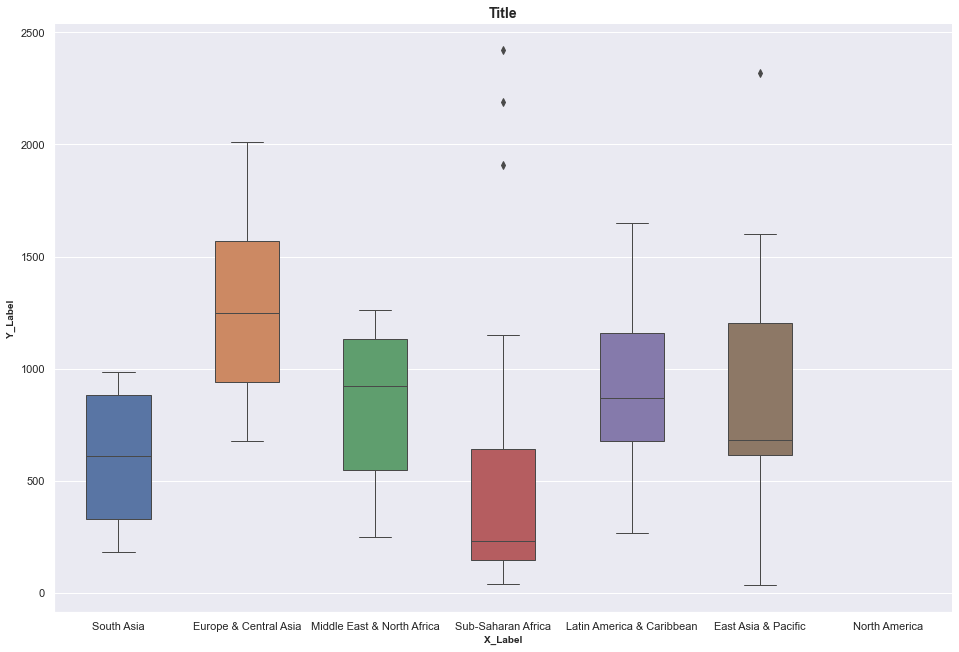

In [125]:
#box plot of the variable Comercial Bank depositors by region
sns.catplot(x="world_bank_region", y="commercial_bank_depositors", kind="box", 
            data=df_2019 ,width=0.5,  height=9 ,linewidth = 1, aspect=1.5);
plt.title('Comercial Bank Depositors by Region'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Region'.title(),
               fontsize = 10, weight = "bold")
plt.ylabel('Comercial Bank Depositors'.title(),
               fontsize = 10, weight = "bold")

Text(18.21, 0.5, 'Y_Label')

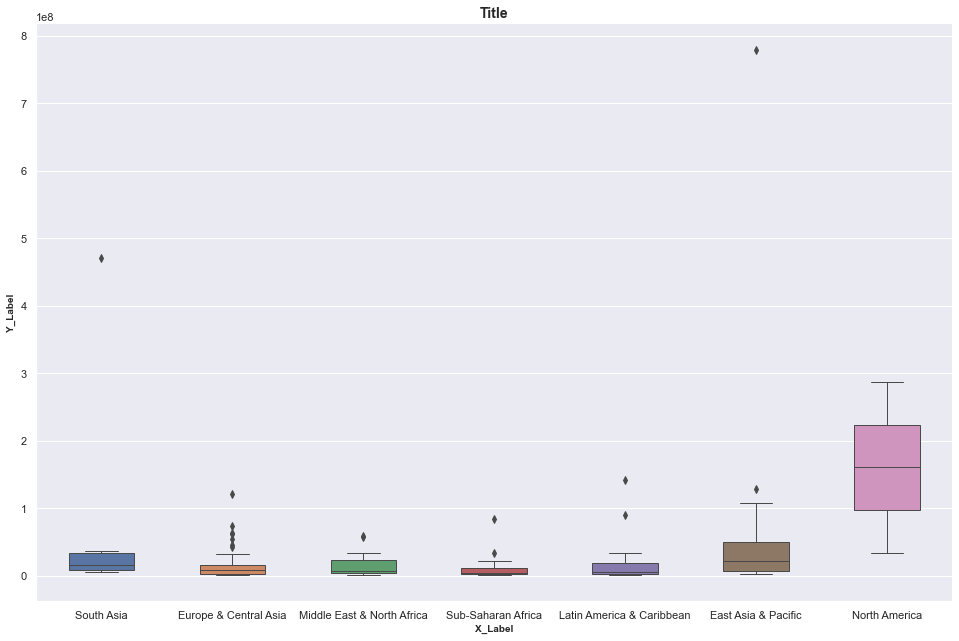

In [126]:
#box plot of the variable internet users by region
sns.catplot(x="world_bank_region", y="internet_users", kind="box", 
            data=df_2019 ,width=0.5,  height=9 ,linewidth = 1, aspect=1.5);
plt.title('Internet Users by Region'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Region'.title(),
               fontsize = 10, weight = "bold")
plt.ylabel('Internet Users'.title(),
               fontsize = 10, weight = "bold")

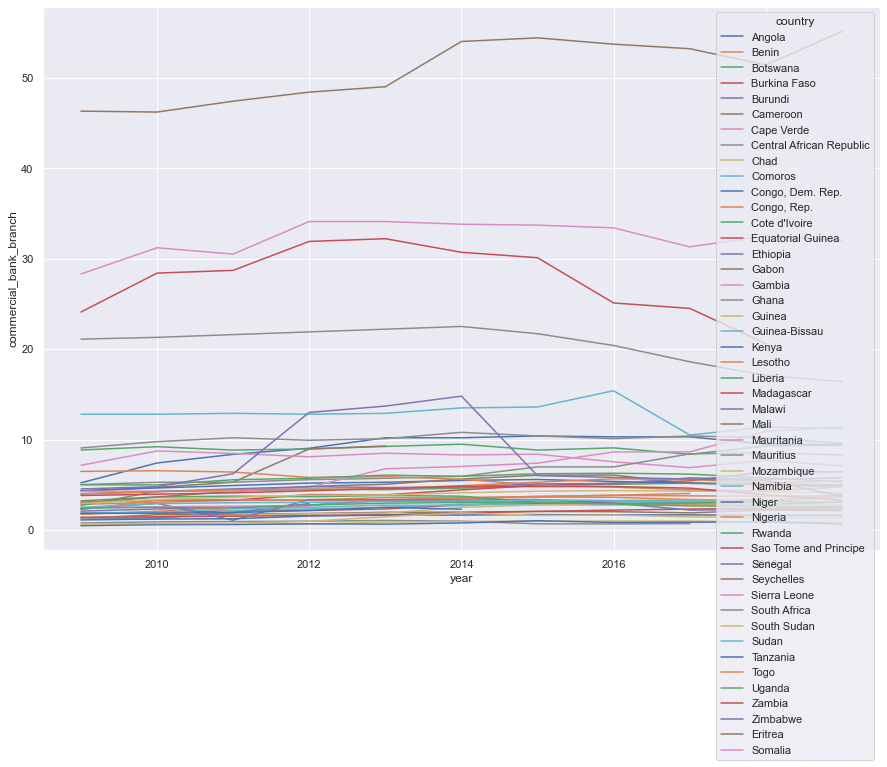

In [127]:
# view commercial bank branches in Sub-Saharan Africa countries only
df_africa = df_final.loc[df_final.world_bank_region == 'Sub-Saharan Africa', :]

df_africa.head()
sns.lineplot(x ='year', y = 'commercial_bank_branch', data=df_africa,palette = 'deep', hue='country', dashes = False ,ci=None);


In [128]:
### When there are too many categories (too many for each to have a clearly distinct color):
### Using a Heatmap instead

In [141]:
# view commercial bank branches in Sub-Saharan Africa countries only
df_africa['Year'] = df_africa['year'].dt.year
comm_bank_yr_country = df_africa.groupby(['Year', 'country'])['commercial_bank_branch'].mean().unstack('Year')

comm_bank_yr_country.head()

C:\Users\husman\AppData\Local\Temp\ipykernel_11752\1441047995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa['Year'] = df_africa['year'].dt.year


Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,
Angola,5.22,7.41,8.37,9.04,10.20,10.20,10.40,10.30,10.30,9.49,9.44
Benin,2.84,3.06,3.29,3.28,3.36,3.46,3.65,3.62,3.37,3.27,3.94
Botswana,8.85,9.21,8.84,8.96,9.24,9.49,8.84,9.08,8.37,9.29,9.37
Burkina Faso,1.83,1.94,2.11,2.16,2.34,2.78,2.91,2.89,2.86,2.83,3.08
Burundi,2.09,2.33,2.54,2.77,3.28,3.20,3.23,3.22,NaN,NaN,NaN


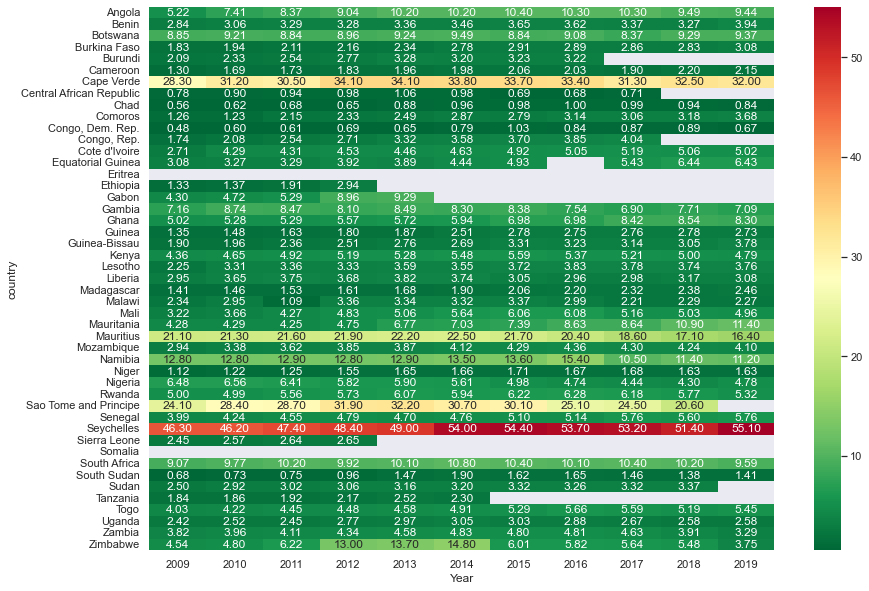

In [142]:
# view commercial bank branches in Sub-Saharan Africa countries only
plt.figure(figsize = [14, 10])

sns.heatmap(comm_bank_yr_country, annot = True, fmt = '.2f', cmap = 'RdYlGn_r');


In [131]:
comm_bank_yr_country.median().median(),

(4.28,)

Observations:
> - ATMs box plots among the regions show long upper whisker in means that atms are varied amongst the most positive quartile group. However, the box plot of ATMs in North America is signifcantly higher than the other regions hence
> - Commercial bank  branches box plot is comparatively relatively short among the regions. suggests that overall, regions have a consistent level of branches across regions. 
This shows that many students have similar views at certain parts of the scale, but in other parts of the scale students are more variable in their views. The long upper whisker in the example means that students views are varied amongst the most positive quartile group, and very similar for the least positive quartile group
> - Commercial bank depositors show differences between box plot among regions. However, there were missing values in North America from the data
> - Internet usage in the box plot suggests that overall regions have a same level of internet usage. The medians (which generally will be close to the average) are all at the same level with exception of North America where about 25% of internet users in 2019 are lower than about 2.2M.
> - Sub-saharan Africa countries has had a sugglish increase in the number of commercial banks and with a medium number of about 4 banks over the years

### Research Question 3  : Is there  relationship between  commercial bank branches, ATMs, commercial bank depositors and internet users?

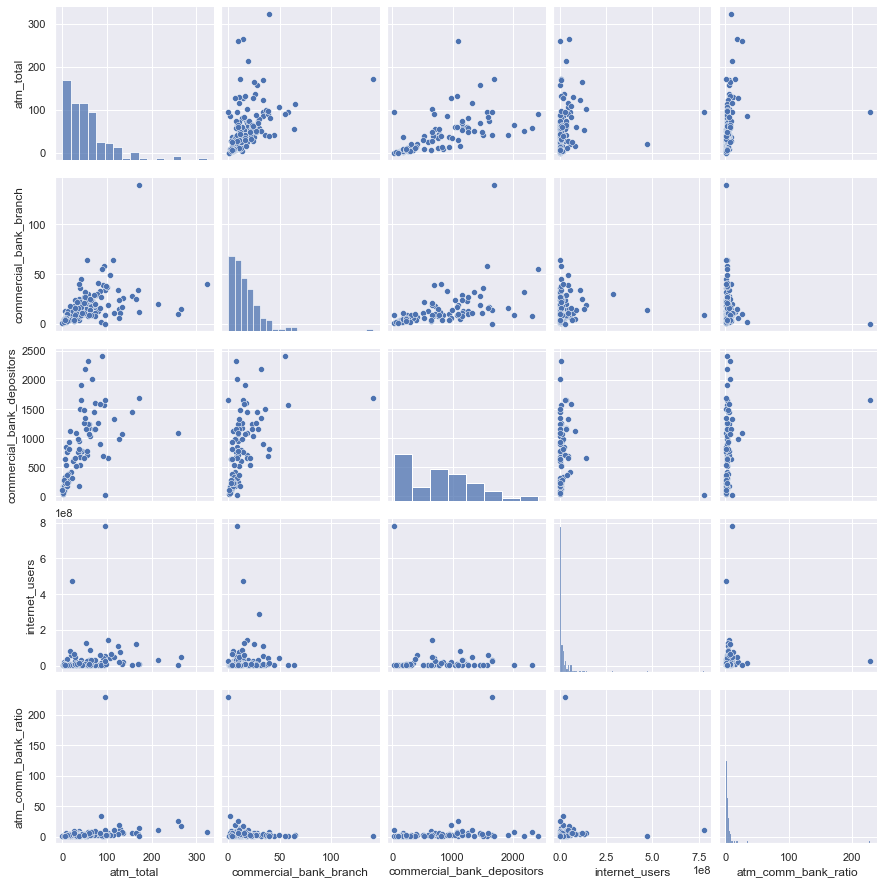

In [132]:
sns.pairplot(df_2019);

In [133]:
# drop NaNs from commercial banks and atms
df_cbb_atm = df_final[df_final[['commercial_bank_branch', 'atm_total']].notna().all(1)][['commercial_bank_branch', 'atm_total']]

In [134]:
# creating a linear fit model
df_cbb_atm_log = np.log(df_cbb_atm).dropna()

X = df_cbb_atm_log.commercial_bank_branch
y = df_cbb_atm_log.atm_total

lm = sms.OLS(y, X)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              atm_total   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                          2.502e+04
Date:                Sat, 20 Aug 2022   Prob (F-statistic):                        0.00
Time:                        10:32:26   Log-Likelihood:                         -2587.5
No. Observations:                1921   AIC:                                      5177.
Df Residuals:                    1920   BIC:                                      5183.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
commercial_bank_branch     1.2622      0.008    158.186      0.000       1.247       1.278
==============================================================================
Omnibus:                      404.673   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2224.676
Skew:                           0.876   Prob(JB):                         0.00
Kurtosis:                       7.972   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

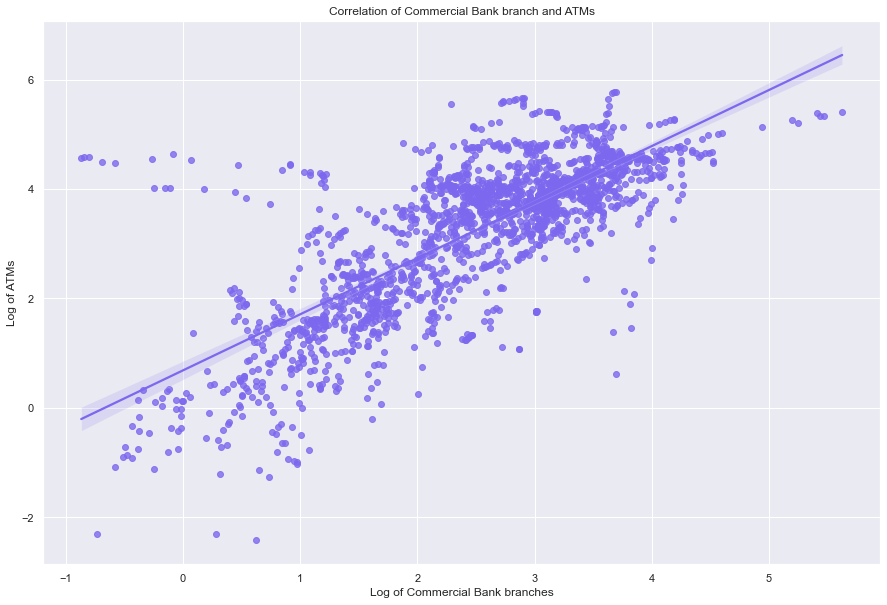

In [135]:
# scatter plot for Commercial Bank branch and ATMs
f, ax = plt.subplots()
sns.regplot(x = np.log(df_cbb_atm.commercial_bank_branch),y = np.log(df_cbb_atm.atm_total), color='mediumslateblue')
plt.annotate('R2={:03.2f}'.format(results.rsquared), xy=(0.0, 8.0))

plt.title('Correlation of Commercial Bank branch and ATMs')
plt.xlabel('Log of Commercial Bank branches')
plt.ylabel('Log of ATMs');

Observations:
> - There is a weak positive association between Commercial Bank branches and total ATMs
> - There is also a weak positive association between Commercial Bank branches and  commercial bank depositors
> - However, there's a strong correlation between Commercial Bank branch and ATMs


<a id='conclusions'></a>
## Conclusions

Research Question 1: How have the number of commercial bank branches, ATMs, commercial bank depositors and internet users changed over time across various the regions?
> - Overall, the number of commercial bank branches have either remained steady or declined since 2009.
> - The number of ATMs have remained stagnant in all regions for the period between 2009  and 2019.
> - Commercial bank depositors continue to increase over the time period across all regions
> - Internet usage have remained the same for all regions except for North America, South Asia and East Asia & Pacific.

Research Question 2 a : What is the shape of the distribution for the latest year 2019?
> - The distribution of number of ATMs, commercial bank branches, commercial bank depositors and internet users is skewed to the right, which indicates that majority of the data is located on the left side of the graph, and the mean, or average, is greater the median.

Research Question 2 b: How does the shape of the distribution differ across geographical regions for 2019? 
> - There are obvious differences between box plots box plot distribution of ATMs, commercial bank branches, commercial bank depositors and internet users. However, for the variable internet users by region the box plot indicates that most regions have a same average of internet users.
> - Sub-saharan Africa  is on the lower end of the box plot in the number of ATMs, commercial bank branches, commercial bank depositors 

Research Question 3  : Is there  relationship between  commercial bank branches, ATMs, commercial bank depositors and internet users?
> - There is a positive correlation among all the three variable: commercial bank branches, ATMs, commercial bank depositors and internet users.

### Limitation
> - Dataset is often missing as in the case of commercial bank depositors data. Hence, data are not good enough for detailed analysis since it is incomplete.

References
- https://pythonbasics.org/read-excel/
- https://github.com/Dachkovski/Investigations-on-hyperinflations/blob/master/Investigations%20on%20hyperinflations.ipynb
- https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe
- https://github.com/NMangera/Udacity_DataAnalysis_Nanodegree/blob/master/Introduction/Gapminder%20World/Investigate%20a%20Dataset%20%5BGapminder%20World%5D.ipynb
- https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots